In [11]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests
#import psycopg2
#from src.scraper import *
from src.process_words import *
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import datetime as dt
import pickle
from itertools import combinations

import networkx as nx
import nxpd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [12]:
#conn = psycopg2.connect(dbname='food_db')
#df = pd.read_sql('SELECT * FROM recipes', con=conn)
#df['food_stems'] = [clean_one_doc(recipe) for recipe in df['foods']]

In [13]:
df = pd.read_pickle('data/featured_recipes.pkl')
df.head()

,id,post_date,title,foods,food_stems
0,27,2018-02-09,Long Life Noodles with Shrimp and Greens,"teaspoon sesame oil, for drizzling stalk green...","[sesam, oil, stalk, onion, carrot, stalk, onio..."
1,28,2018-02-09,Ginger-Onion Whole Steamed Fish,"stalks green onions, cut into 3-inch segments,...","[stalk, onion, segment, wine, marsala, wine, o..."
2,29,2018-02-09,Smacked Cucumber,"teaspoon sugar cloves garlic, crushed tablespo...","[sugar, clove, flake, chili, cucumb, cucumb, v..."
3,30,2018-02-08,Neck Bones and Lima Beans,"salt and pepper, to taste tablespoons canola o...","[oil, sage, lima, bean, water, nutmeg, onion, ..."
4,31,2018-02-07,Angel Wings (Faworki),pinch sea salt confectioner’s sugar for servin...,"[sea, confection, cream, egg, yolk, powder, co..."


In [14]:
y, full_X = vectorize_all(df, 'foods', split_years=False)

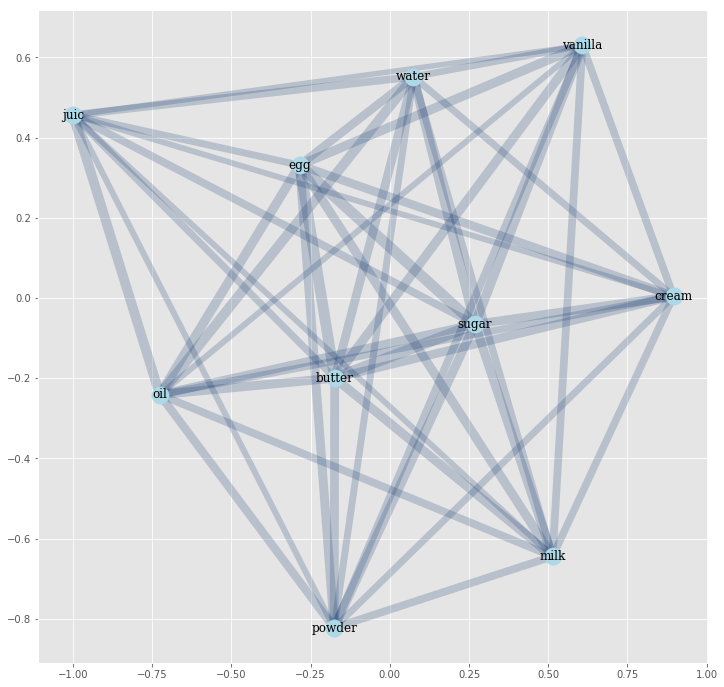

In [19]:
#test make_graph
G = make_graph(df, full_X, 10, plot=True)

In [20]:
full_G = make_graph(df, full_X, n=2650, plot=False)
#nx.write_gpickle(full_G, "data/food_graph.gpickle")

In [41]:
#Write a function to do this:
food = 'ginger'
too_common = ['butter', 'oil', 'water', 'egg', 'powder', 
              'sugar', 'juic', 'extract', 'kosher', 'stick', 'sea']
porter = PorterStemmer()
food_stem = porter.stem(food.lower())
pairs = sorted(full_G[food_stem].items(), key=lambda edge: edge[1]['weight'])[::-1]
[food[0] for food in pairs[:10+len(too_common)] if food[0] not in too_common][:10]

['clove',
 'onion',
 'sauc',
 'rice',
 'milk',
 'cinnamon',
 'vinegar',
 'soy',
 'cilantro',
 'scallion']

In [31]:
pairs[:10+len(too_common)]

[('butter', {'weight': 525}),
 ('egg', {'weight': 501}),
 ('sugar', {'weight': 457}),
 ('oil', {'weight': 322}),
 ('powder', {'weight': 321}),
 ('water', {'weight': 315}),
 ('milk', {'weight': 266}),
 ('vanilla', {'weight': 260}),
 ('cream', {'weight': 185}),
 ('extract', {'weight': 141}),
 ('yeast', {'weight': 138}),
 ('kosher', {'weight': 120}),
 ('stick', {'weight': 114}),
 ('sea', {'weight': 110}),
 ('juic', {'weight': 105}),
 ('wheat', {'weight': 104}),
 ('cinnamon', {'weight': 102})]

### Make Clusters

In [ ]:
k = process_words.get_best_k(full_X)
k

In [ ]:
full_centroids, full_labels = process_words.make_clusters(
    full_X, full_features, k)

In [ ]:
full_centroids

In [ ]:
full_cluster_df, full_labels = process_words.make_one_cluster_df(full_X, full_features, k, 'all')

In [ ]:
full_cluster_df.head(20)

In [ ]:
total = np.sum(full_X, axis=0)
total = np.asarray(total)[0]
top200 = np.array([np.array(full_features)[i] for i in np.argsort(total)[-1:-200-1:-1]])
top50 = np.array([np.array(full_features)[i] for i in np.argsort(total)[-1:-50-1:-1]])
top10 = np.array([np.array(full_features)[i] for i in np.argsort(total)[-1:-10-1:-1]])
print ("top 200 by total tf-idf")
print (top200)

In [ ]:
### Future work: Create a function to make graphs of a given list of ingredients